In [1]:
%matplotlib inline

In [20]:
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

In [3]:
def get_mean(row, j):
    return row[j:min((j + 20), len(row) - 1)].mean()

In [17]:
def get_cropped(img, filter_fun):
    img_new = img.copy()
    for rot in range(4):
        #print("Rotation %d..." % rot)
        import sys
        sys.stdout.flush()
        img_new = np.rot90(img_new, 1)
        num_iter = 0
        max_j = 0
        for i, row in enumerate(img_new):
            num_iter += 1
            mean = get_mean(row, 0)
            j = 0
            while filter_fun(mean):
                mean = get_mean(row, j)
                j += 1
            mean = get_mean(row, 0)
            if j > max_j and j < img_new.shape[1] / 2:
                max_j = j
        #print("Cropping to %d" % max_j)
        img_new = img_new[:, max_j:]
    return img_new

In [5]:
def white_filter_fun(mean):
    return mean >= 0.8

In [6]:
def black_filter_fun(mean):
    return mean < 0.1

In [11]:
img = imread("images/TS/10500-TS.png")
#img = equalize_hist(img)
img = rgb2gray(img)

Rotation 0...
Cropping to 167
Rotation 1...
Cropping to 5
Rotation 2...
Cropping to 50
Rotation 3...
Cropping to 9
Rotation 0...
Cropping to 0
Rotation 1...
Cropping to 0
Rotation 2...
Cropping to 0
Rotation 3...
Cropping to 0


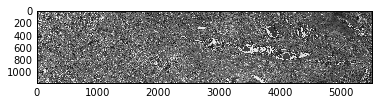

In [12]:
imshow(get_cropped(get_cropped(img, white_filter_fun), black_filter_fun))

In [14]:
from transform import load_training

In [15]:
training = load_training()

In [24]:
for i, row in training.iterrows():
    row_patches = []
    row_output = []
    name = row['name']
    fga = row['fga']
    print("Transforming image %s" % name)
    import sys
    sys.stdout.flush()
    for kind in ["DX", "TS"]:
        img = imread("images/%s/%s-%s.png" % (kind, name, kind))
        img = rgb2gray(img)
        img_cropped = get_cropped(get_cropped(img, white_filter_fun), black_filter_fun)
        with open("images-cropped/%s/%s-%s.png" % (kind, name, kind), 'w') as f:
            np.save(f, img_cropped)

Transforming image 10500
Transforming image 10549
Transforming image 11169
Transforming image 13188
Transforming image 13699
Transforming image 14812
Transforming image 15160
Transforming image 15456
Transforming image 15770
Transforming image 16199
Transforming image 18162
Transforming image 19568


/Users/tavi/.virtualenvs/pcf/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/tavi/.virtualenvs/pcf/lib/python2.7/site-packages/PIL/Image.py:2215: DecompressionBombWarning: Image size (99721550 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Transforming image 19583
Transforming image 19906
Transforming image 20830
Transforming image 20843
Transforming image 21157
Transforming image 21803
Transforming image 22321
Transforming image 22337
Transforming image 22926
Transforming image 23817


KeyboardInterrupt: 